# Quantum Machine Learning challenge

Welcome to the Quantum Machine Learning challenge of the MQST Qiskit Fall Fest!
In this challenge, you will explore how quantum computing (QC) and machine learning (ML) can be brought together in the exciting field of Quantum Machine learning (QML). You will start using quantum computers for a simple classical classification task, and your fundamental challenge will be to design a "Quantum Neural Network" (QNN) that classifies input quantum data according to the phase it corresponds to.

This challenge is divided in two parts:
- Deal with a classical classification problem with a parametrized quantum computer. You will be asked to encode and process the data on a paramtrized quantum computer, and finally train it classically to attempt to solve the problem.
- Deal with a quantum classification task, to learn to identify the phases, and reconstruct the phase diagram, of a quantum spin chain. You will reuse the process from the previous section, but instead of embeding classical data into the quantum computer, you will now input the spin states as the initial state of the quantum computer.

#### First install the necessary packages if you haven't already:

In [ ]:
# Uncomment to install the necessary packages

%pip install --upgrade pip
%pip install numpy==2.3.4
%pip install scipy==1.16.2
%pip install matplotlib==3.10.7
%pip install jupyter
%pip install qiskit[visualization]==2.2
# # For Local Linux or Mac, you can use the following command:
# # %pip install 'qiskit[visualization]'
%pip install qiskit_algorithms==0.4.0
%pip install qiskit_aer==0.17.2
%pip install qiskit_ibm_runtime==0.41.1
%pip install qiskit_ibm_transpiler==0.14.3

---

## 1.Introduction

This introduction and gives a brief overview of the machine learning idea that is considered:

If not of machine learning, everyone has heard of artificial intelligence. From humbler origins, to the current large language models, machine learning has permeated everything and become widespread. We will focus on the supervised learning paradigm. Simplifying, we look to solve a problem where we want to assign to each input $x$ some corresponding output $y = f(x)$. In fact this is a very general way to see any problem, so we note two distinct examples:
- An example is finding how many prime factors an integer has. This is a simple problem in the sense that we **know** how to express the $f$ that solves it, although that does not mean it is easy to do so efficiently. In this case, it has only been after Shor's quantum algorithm that this problem, previously thought of as computationally hard, has been "broken".
- A much different example is the task of classifying pictures of cats and dogs. In this case we know, or rather we assume, that there is some function that solves the problem because **we** can solve it. We can manually look at pictures and tell if it contains a cat or a dog. In spite of this, no one is able to come up with a simple and direct computer algorithm to solve this task.

It is for these latter kind of problems where supervised learning shines the most. The fundamental principle is that instead of trying to find this goal function $f$ directly, we take a generic parametrized guess. Now, exploiting that we can previously prepare some sample inputs/outputs (such as prelabelled cats and dogs pictures), we tweak our parameters to find the best fit. In fact, you have already done supervised learning before, as taking a linear regression is technically just that, where the guess (ansatz) is a linear function. Similarly, just as a linear regression will not directly work for a non linear problem, this choice of our ansatz is important for each problem.

On the other hand, quantum computing has emerged to find the physical limit of information processing, and ideas of combining it with machine learning happened soon after. There are many ways one can quantumly enhance machine learning, such as doing some computational-heavy steps on a possibly faster quantum computer. We will instead focus on using a parametrized quantum computer as ansatz for the problem solving function $f$, a so-called (abusing language) Quantum Neural Network. Your goal during this whole challenge is to design good models for quantum machine learning, which is still an ongoing research question while quantum resources are limited to perform big scale tests.

First you will apply it for a classical problem, which will probably turn out bad! Even if Quantum Computers can do some tasks better, it is important to realise this is not an actually easy goal to achieve. Quantum intuition can differ a lot from classical intuition, so it is hard to come up with good designs. Finally, you will apply it for Quantum Phase Recongition.


### A simple task

Consider the following classical data points, which are classified into one of two classes. Our goal is to learn to perform this classification, not by memorizing every point but rather by learning the underlying rule, so we will able to classify new points too. Below this data is generated and you can see it ploted, with two different classes


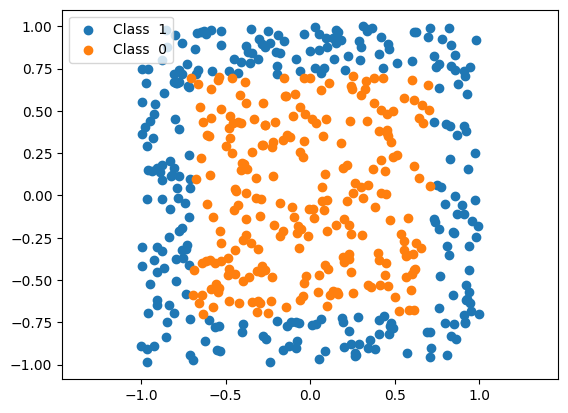

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Set random seed so results are repeatable
np.random.seed(2025)

## Underlying classification, outside of square or inside
def underlying_function(R: np.ndarray) -> float:
    return np.max(np.abs(R), axis=1) > 1/np.sqrt(2)


## Prepare random dataset
Nsamples = 500
R = 2*np.random.random((Nsamples,2)) - np.array([1,1])  # Data points, uniform in [-1,1]x[-1,1]

y = underlying_function(R)   # Classification
R_class1 = R[y]                    # Class +1: Outside of square
R_class0 = R[np.logical_not( y )]  # Class  0: Inside  of square
plt.axis('equal')
plt.scatter(R_class1[:,0], R_class1[:,1], label="Class  1")
plt.scatter(R_class0[:,0], R_class0[:,1], label="Class  0")
plt.legend(loc = "upper left")

The underlying function is simple: points inside the $\sqrt{2}$ square are in class 0 and points outside in class 1, but we must now try to learn this in a generic way, even if this is a simple case.
We will learn to classify points, by learning the underlying distribution, which you can see is $f(\vec{x}) = 0$, if $\vec{x} \in [-\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}] \times [-\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}] $; $\quad 1$ otherwise. To do this, you will create a Quantum Neural Network (QNN) and later you will train it on the data.

### 1.1 Classical to Quantum

Let's create the Quantum Neural Network. First, encode your problem, your data, into the quantum computer. Do it for a very simple 2 qubit QC.
> Hint: As an example you may use Qiskit's `qiskit.circuit.library.ZZFeatureMap` or `ZFeatureMap` to encode real numbers as angles of rotation on each qubit

You will also want to define some processing layers that use trainable parameters.
> Hint: If you do not want to manually construct them, with gates, you may use provided examples like `qiskit.circuit.library.EfficientSU2` or `qiskit.circuit.library.TwoLocal`

The principle is to use gates, such as $R_Y$ rotations, where the angles will be given according to some input/tunable parameters


**The code snippets are orientative to guide you through the problems, but feel free to come up with your own solutions**. For instance, you may mix input parameters and trainable parameters on the same gate, or intertwine gates (also called data re-reuploading) instead of applying encoding first and processing later. Some of these ideas will also be proposed later


In [ ]:
## Your code here
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap     # Example featuremap/encoding
from qiskit.circuit.library import EfficientSU2, RealAmplitudes  # Example processing layer
from qiskit import transpile
# Example of parameters you may use. Default input. If using default, inputs are called x and trainable_parameters θ
inputs = ParameterVector('x', 2)
trainable_parameters = ParameterVector('θ', 8)

# By default, you may use only 2 qubits, one for each coordinate

def encoding(inputs: ParameterVector) -> QuantumCircuit:
    """Returns an encoder that will encode a point in space (x,y) into a quantum circuit.

    Args:
        inputs (ParameterVector): parameters corresponding to input (x, y)

    Returns:
        encoding_circuit (QuantumCircuit): Returns a QuantumCircuit, which encodes the classical data into the circuit
    """
    encoding_circuit = QuantumCircuit(2)
    encoding_circuit.ry(2*inputs[0],0)
    encoding_circuit.ry(2*inputs[1],1)
    return encoding_circuit


def processing(trainable_parameters: ParameterVector) -> QuantumCircuit:
    """Returns a processing layer that will be trained to try to solve our problem

    Args:
        trainable_parameters (ParameterVector): parameters that will be trained to attempt to solve the problem

    Returns:
        processing_circuit (QuantumCircuit): Returns a QuantumCircuit that encodes the data into the circuit
    """
    # YOUR CODE HERE
    processing_circuit = qiskit.circuit.library.EfficientSU2(2, reps=1, entanglement='full')
    """processing_circuit = QuantumCircuit(2)
    for i in range(len(trainable_parameters)):
        processing_circuit.ry(2*trainable_parameters[i], i%2)"""
    backend=AerSimulator()
    qc_transpiled = transpile(processing_circuit, backend)
    return processing_circuit

Here you may draw your encoding,

7

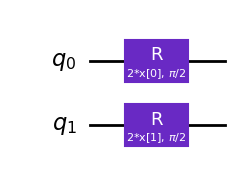

In [ ]:
encoding_circuit = encoding(inputs)
encoding_circuit.decompose().draw(output='mpl', style='textbook')
7

processing

7

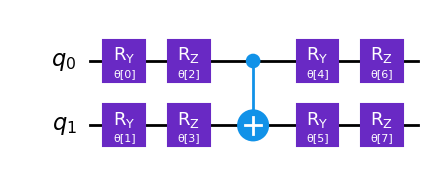

In [ ]:
processing_circuit = processing(trainable_parameters)
processing_circuit.decompose().draw(output='mpl', style='textbook')
7

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import YGate, UnitaryGate
import numpy as np

SYGate = UnitaryGate(YGate().power(1/2), label=r"$\sqrt{Y}$")
SYdgGate = UnitaryGate(SYGate.inverse(), label=r"$\sqrt{Y}^\dag$")

def generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, num_cl_bits=0, trotter_barriers = False, layer_barriers = False):
    if num_cl_bits == 0:
        qc = QuantumCircuit(num_qubits)
    else:
        qc = QuantumCircuit(num_qubits, num_cl_bits)

    for trotter_step in range(num_trotter_steps):
        add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers)
        if trotter_barriers:
            qc.barrier()

    return qc

def add_1d_tfim_trotter_layer(qc, rx_angle, layer_barriers = False):
    # Adding Rzz in the even layers
    for i in range(0, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
    if layer_barriers:
        qc.barrier()
    # Adding Rzz in the odd layers
    for i in range(1, qc.num_qubits-1, 2):
        qc.sdg([i, i+1])
        qc.append(SYGate, [i+1])
        qc.cx(i, i+1)
        qc.append(SYdgGate, [i+1])
    if layer_barriers:
        qc.barrier()
    qc.rx(rx_angle, list(range(qc.num_qubits)))
    if layer_barriers:
        qc.barrier()

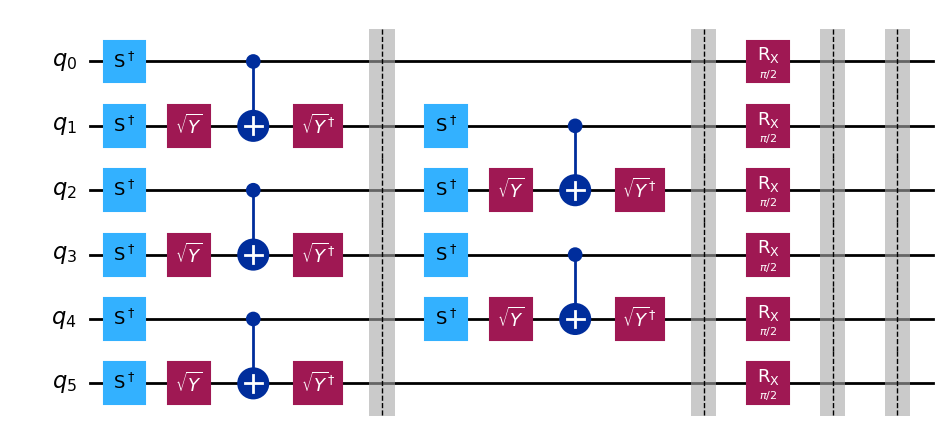

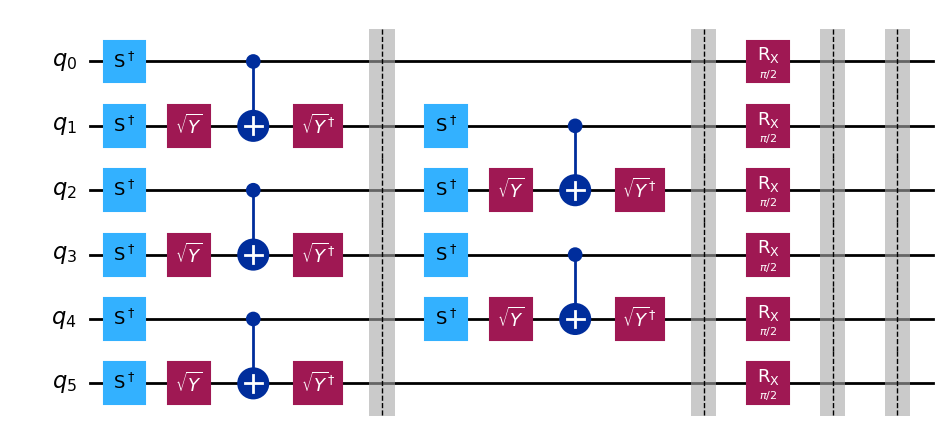

In [ ]:
num_qubits = 6
num_trotter_steps = 1
rx_angle = 0.5 * np.pi

qc = generate_1d_tfim_circuit(num_qubits, num_trotter_steps, rx_angle, trotter_barriers=True, layer_barriers=True)
qc.draw(output='mpl', fold=-1)

and their combination:
> Again, remember you can join encoding and processing layers differently, or mix them

7

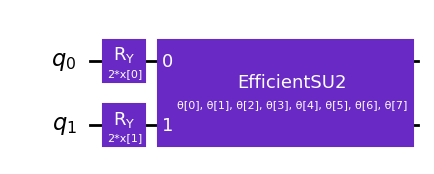

In [ ]:
# Assign our parameters, may need to adapt
encoding_circuit.assign_parameters(inputs, inplace=True)
processing_circuit.assign_parameters(trainable_parameters, inplace=True)

# Define our QNN Circuit
qnn_circuit = encoding_circuit.compose(processing_circuit)
qnn_circuit.draw(output='mpl', style='textbook')
7

### 1.2. Finish your QNN

You have prepared a quantum circuit, parametrized, that will attempt to classify our data, you now need to define how to interpret the circuit outputs to do the classification. We can do so by reading the output, for instance the first qubit, and using and assigning the class according to the result (measuring 0 or measuring 1). Moreover, you can treat the output as the probability vector of the different outcomes, and train it accordingly.


Keep in mind that Qiskit uses Little Endian notation (top qubit q[0] is last qubit and so on $|abc\rangle \to$ q[0]=c, q[1]=b, q[2]=a), and that the default sampler output is the integer representation of the bitstring you need to interpret.

To do this, define a forward function, to evaluate running our QNN.

> Again, all function suggestions are orientative. If you prefer you may also work with Estimators (expectation values) instead of Samplers.

In [ ]:
%pip install qiskit_machine_learning

In [ ]:
#from qiskit_machine_learning.neural_networks import EstimatorQNN, SamplerQNN    # Libraries which could simplify process, but icompatible with qiskit 2>
#from qiskit_machine_learning.algorithms import NeuralNetworkClassifier
from qiskit_ibm_runtime import Sampler
from qiskit_aer import AerSimulator
from qiskit_algorithms.gradients import ParamShiftSamplerGradient
from qiskit.quantum_info import Statevector, Operator, Pauli
import numpy as np

# Define a forward pass of your QNN
def forwardnooo(qnn_circuit: QuantumCircuit, inputs: np.ndarray, trainable_parameters: np.ndarray, sampler: Sampler) -> np.ndarray:
    """
    "Forward pass of the Q neural network", returns output probability vector of circuit (or other way that occurs to you, for insance expected value of observable)

    Args:
        qnn_circuit (QuantumCircuit): circuit to run, including some input encoding and trainable processing gates.
        inputs (np.ndarray): data inputs encoded.
        trainable_parameters (np.ndarray): neural network ansatz parameters.
        sampler (Sampler): Sampler to use.

    Returns:
        qnn_output (np.ndarray): Array for the probability distribution or samples of measurement outcomes of circuit
    """

    output =qnn.forward(inputs, trainable_parameters)
    qnn_output = np.ndarray(output.values())
    """qnn_circuit.assign_parameters(inputs, inplace=True)
    qnn_circuit.assign_parameters(trainable_parameters, inplace=True)
    state = Statevector(qnn_circuit)
    qnn_output = np.ndarray(state.expectation_values(Operator(Pauli("ZI"))), state.expectation_values(Operator(Pauli("IZ"))))"""

    return qnn_output

# Define a backward pass of your QNN. Optional, but useful and necessary to use later for minimization procedures that require computing derivatives
def backwards(qnn_circuit: QuantumCircuit, inputs: np.ndarray, trainable_parameters: np.ndarray, sampler: Sampler) -> np.ndarray:
    """
    "Backwards pass of the Q neural network", compute gradients of parameters using ParamShiftSamplerGradient.

    Args:
        qnn_circuit (QuantumCircuit): circuit to run, including some input encoding and trainable processing gates.
        inputs (np.ndarray): data inputs encoded.
        trainable_parameters (np.ndarray): neural network ansatz parameters.
        sampler (Sampler): Sampler to use.

    Returns:
        qnn_output (np.ndarray): Array for the probability distribution or samples of measurement outcomes of circuit
    """
    # YOUR CODE HERE

    return qnn_output


In [ ]:
from qiskit.primitives import BaseEstimatorV2
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.quantum_info.operators.base_operator import BaseOperator

def forward(
    circuit: QuantumCircuit,
    input_params: np.ndarray,
    weight_params: np.ndarray,
    estimator: BaseEstimatorV2,
    observable: BaseOperator,
) -> np.ndarray:
    """
    Forward pass of the neural network.

    Args:
        circuit: circuit consisting of data loader gates and the neural network ansatz.
        input_params: data encoding parameters.
        weight_params: neural network ansatz parameters.
        estimator: EstimatorV2 primitive.
        observable: a single observable to compute the expectation over.

    Returns:
        expectation_values: an array (for one observable) or a matrix (for a sequence of observables) of expectation values.
        Rows correspond to observables and columns to data samples.
    """
    num_samples = input_params.shape[0]
    weights = np.broadcast_to(weight_params, (num_samples, len(weight_params)))
    params = np.concatenate((input_params, weights), axis=1)
    pub = (circuit, observable, params)
    job = estimator.run([pub])
    result = job.result()[0]
    expectation_values = result.data.evs

    return expectation_values

Z0 = SparsePauliOp.from_list([("IZ", 1)])
Z1 = SparsePauliOp.from_list([("ZI", 1)])

"""x = np.array([[2,2]])
thetas = np.array([1,2,3,4,5,6,7,8])
estimator = Estimator()
qnn_circuit = qnn_circuit.decompose(reps=1)

print(forward(qnn_circuit, x, thetas, estimator, Z0))
print(forward(qnn_circuit, x, thetas, estimator, Z1))"""



'x = np.array([[2,2]])\nthetas = np.array([1,2,3,4,5,6,7,8])\nestimator = Estimator()\nqnn_circuit = qnn_circuit.decompose(reps=1)\n\nprint(forward(qnn_circuit, x, thetas, estimator, Z0))\nprint(forward(qnn_circuit, x, thetas, estimator, Z1))'

### 1.3 Train your QNN

Now you must train your QNN, to do this define a loss funciton and an optimizer.


For instance, use a mean squared error loss function of the form
$$\sum (QNN_{\vec{\theta}}(\vec{x_i})-y_i)^2,$$
where $QNN()$ represents the output of your quantum circuit (forward pass). If you are following the example, then the output of the QNN is the array of probabilities for each outcome (classification), so you should treat $y_i$ as a vector too (either [1,0] or [0,1])






In [ ]:
from qiskit.quantum_info import SparsePauliOp # Assuming SparsePauliOp is defined elsewhere

# Your code here
def loss(theta, x, y):
    qnn_circuit2 = qnn_circuit.decompose(reps=1)
    estimator = Estimator() # Assuming Estimator is defined elsewhere
    L=0
    for i in range(len(x)):
      # Reshape the input to be a 2D array with a single row
      input_sample = x[i].reshape(1, -1)
      QNN1 = forward(qnn_circuit2, input_sample, theta, estimator, Z0) # Assuming Z0 is defined elsewhere
      QNN2 = forward(qnn_circuit2, input_sample, theta, estimator, Z1) # Assuming Z1 is defined elsewhere
      L += (QNN1-y[i][0])**2 + (QNN2-y[i][1])**2
    return L

"""x = np.array([[2,2]])
thetas = np.array([1,2,3,4,5,6,7,8])
print(loss(qnn_circuit, x, thetas, [1,0]))"""

'x = np.array([[2,2]])\nthetas = np.array([1,2,3,4,5,6,7,8])\nprint(loss(qnn_circuit, x, thetas, [1,0]))'


Minimize the loss, computed for your data points, to train your model. You can use scipy's minimize, with built in optimizers such as COBYLA.


Store also the loss evolution (and other parameters you consider interesting) to plot them later.

> Hint: Remember to look for Qiskit resources, for instance you may find [this](https://quantum.cloud.ibm.com/learning/en/courses/quantum-machine-learning/qvc-qnn) tutorial useful.

In [ ]:
from scipy.optimize import minimize

# Define loss value_list that will be updated
loss_value_list = []

# Your code here
ys = [[1,1] if i else [-1,-1] for i in y]

batch_size = 10
num_epochs = 2
num_samples = len(R)

from qiskit.primitives import StatevectorEstimator as Estimator

circuit = qnn_circuit
estimator = Estimator()
iter = 0

np.random.seed(77)
weight_params = np.random.rand(len(trainable_parameters))

for epoch in range(num_epochs):
  for i in range((num_samples - 1) // batch_size + 1):
    print(f"Epoch: {epoch}, batch: {i}")
    start_i = i * batch_size
    end_i = start_i + batch_size
    train_R_batch = np.array(R[start_i:end_i])
    train_labels_batch = np.array(ys[start_i:end_i])
    input_params = train_R_batch
    target = train_labels_batch
    iter = 0
    res = minimize(
            loss, weight_params, args=(input_params, target), method="COBYLA", options={"maxiter": 100}
        )
    weight_params = res.x

Epoch: 0, batch: 0
Epoch: 0, batch: 1
Epoch: 0, batch: 2
Epoch: 0, batch: 3
Epoch: 0, batch: 4
Epoch: 0, batch: 5
Epoch: 0, batch: 6
Epoch: 0, batch: 7
Epoch: 0, batch: 8
Epoch: 0, batch: 9
Epoch: 0, batch: 10
Epoch: 0, batch: 11
Epoch: 0, batch: 12
Epoch: 0, batch: 13
Epoch: 0, batch: 14
Epoch: 0, batch: 15
Epoch: 0, batch: 16
Epoch: 0, batch: 17
Epoch: 0, batch: 18
Epoch: 0, batch: 19
Epoch: 0, batch: 20
Epoch: 0, batch: 21
Epoch: 0, batch: 22
Epoch: 0, batch: 23
Epoch: 0, batch: 24
Epoch: 0, batch: 25
Epoch: 0, batch: 26
Epoch: 0, batch: 27
Epoch: 0, batch: 28
Epoch: 0, batch: 29
Epoch: 0, batch: 30
Epoch: 0, batch: 31
Epoch: 0, batch: 32
Epoch: 0, batch: 33
Epoch: 0, batch: 34
Epoch: 0, batch: 35
Epoch: 0, batch: 36
Epoch: 0, batch: 37
Epoch: 0, batch: 38
Epoch: 0, batch: 39
Epoch: 0, batch: 40
Epoch: 0, batch: 41
Epoch: 0, batch: 42
Epoch: 0, batch: 43
Epoch: 0, batch: 44
Epoch: 0, batch: 45
Epoch: 0, batch: 46
Epoch: 0, batch: 47
Epoch: 0, batch: 48
Epoch: 0, batch: 49
Epoch: 1, 

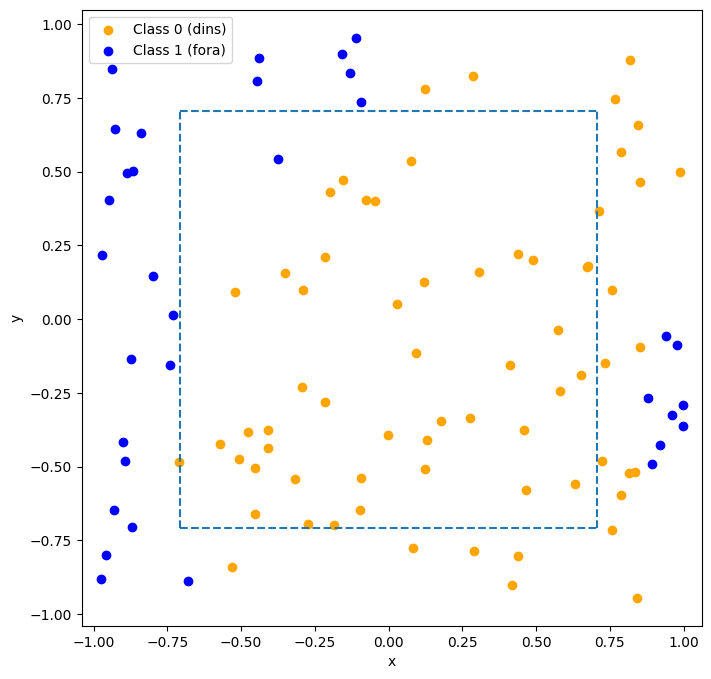

In [ ]:
N_testing = 100
R_test = 2*np.random.random((N_testing,2)) - np.array([1,1])  # Data points, uniform in [-1,1]x[-1,1]
y_test = underlying_function(R_test)
ys_test = [[1,1] if i else [-1,-1] for i in y_test]

dins = []
fora = []
for i in range(N_testing):
  Ri = R_test[i].reshape(1, -1)
  # Assuming Z0 and Z1 are defined and represent observables for class 0 and class 1 respectively
  # And assuming forward function is defined and works correctly
  esperats_Z0 = forward(qnn_circuit, Ri, weight_params, estimator, Z0)
  esperats_Z1 = forward(qnn_circuit, Ri, weight_params, estimator, Z1)

  # Determine class based on expectation values. This logic might need adjustment
  # depending on how your QNN output maps to classes.
  # For example, if Z0 corresponds to class 0 and Z1 to class 1,
  # you might classify based on which expectation value is higher, or if they are positive/negative.
  # The original code used a condition based on both esperats[0] and esperats[1] being negative
  # which seems unusual. I will use a simple thresholding example.
  # You may need to adjust this classification logic based on your QNN design.

  # Example classification logic: if expectation value of Z0 is below a threshold, classify as class 0, otherwise class 1
  # This assumes Z0 is designed to distinguish between the classes.
  # Let's use a simple threshold of 0 for demonstration, similar in spirit to the original attempt's negative check.
  # You should refine this based on how your QNN is trained to output class information.
  if esperats_Z0 < 0: # Example condition, adjust based on your QNN output interpretation
    dins.append(Ri[0]) # Append the 1D array of coordinates
  else:
    fora.append(Ri[0]) # Append the 1D array of coordinates

# Convert lists of arrays to numpy arrays for plotting
dins = np.array(dins)
fora = np.array(fora)


plt.figure(figsize=(8,8))
# Check if dins is not empty before plotting
if dins.shape[0] > 0:
  plt.scatter(dins[:,0], dins[:,1], color="orange", label="Class 0 (dins)") # Corrected label to Class 0
# Check if fora is not empty before plotting
if fora.shape[0] > 0:
  plt.scatter(fora[:,0], fora[:,1], color="blue", label="Class 1 (fora)")

plt.hlines(1/np.sqrt(2), -1/np.sqrt(2), 1/np.sqrt(2), linestyle="--")
plt.hlines(-1/np.sqrt(2), -1/np.sqrt(2), 1/np.sqrt(2), linestyle="--")
plt.vlines(1/np.sqrt(2), -1/np.sqrt(2), 1/np.sqrt(2), linestyle="--")
plt.vlines(-1/np.sqrt(2), -1/np.sqrt(2), 1/np.sqrt(2), linestyle="--")
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### 1.4 Plot your reconstructed classification

### 1.5 Explore
These sections is more optional, if you are doing well you may skip to section 2 already. If you get stuck at section 2, you can get back to work on it, or work on it later, or split it with other members of the group.


#### 1.5.1 Data re-uploading

Instead of just changing the encoding layer and the processing layer, explore here if you can obtain better results by intertwining them:

Build your circuit with an encoding layer, a processing layer, another encoding layer and another processing layer. As this will increase the complexity, you may also want to simplify the layers themselves. Try with different ammounts of intertwining, do you get better results?

In [ ]:
# Code here

## 2. Putting more quantum in Quantum Machine Learning

Right now you have worked on a classical classification problem using quantum computers. Now we switch to the main challenge.

Your task will be to train a quantum machine learning model to classify which phase of matter corresponds to each input quantum state.

We are going to study now the XY model on a periodic chain, with a hamiltonian representing its energy and properties given by

$$H = -\sum^N_{j=1} \left [ \left(\frac{1+\gamma}{2}\right) X_j X_{j+1} + \left(\frac{1-\gamma}{2}\right) Y_j Y_{j+1}  + h Z_j \right],$$

with $\sigma_{N+1}=\sigma_1$.
It has the following simple phase diagram, where we will focus on the $h,\gamma>0$ region, with phase transitions at $h = 1$ and at the circular boundary $\gamma^2 + h^2 = 1$:

![image.png](attachment:image.png)

### 2.1 Implement the hamiltonian


First you must implement the hamiltonian in Qiskit

In [ ]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh  # iterative sparse solver (Lanczos)

def XY_hamiltonian(gamma: float, h: float, Nsites: int) -> SparsePauliOp:
    """Returns the XY Hamiltonian as a SparsePauliOp.

    H = - sum_j [ (1+gamma)/2 * X_j X_{j+1} + (1-gamma)/2 * Y_j Y_{j+1} + h * Z_j ]
    periodic boundary conditions: site N -> site 0

    Note: Pauli string ordering follows Qiskit's convention for labels (leftmost char = qubit 0).
    """
    pauli_labels = []
    coeffs = []

    # coefficients for XX and YY
    coeff_XX = - (1 + gamma) / 2.0
    coeff_YY = - (1 - gamma) / 2.0
    coeff_Z  = - h

    for j in range(Nsites):
        jp1 = (j + 1) % Nsites  # periodic next index

        # Build X_j X_{j+1} string
        xs = ['I'] * Nsites
        xs[j] = 'X'
        xs[jp1] = 'X'
        pauli_labels.append(''.join(xs))
        coeffs.append(coeff_XX)

        # Build Y_j Y_{j+1} string
        ys = ['I'] * Nsites
        ys[j] = 'Y'
        ys[jp1] = 'Y'
        pauli_labels.append(''.join(ys))
        coeffs.append(coeff_YY)

        # Build Z_j term
        zs = ['I'] * Nsites
        zs[j] = 'Z'
        pauli_labels.append(''.join(zs))
        coeffs.append(coeff_Z)

    # Create SparsePauliOp from list of (label, coeff)
    # It's fine if some labels repeat; SparsePauliOp will internally combine.
    hamiltonian = SparsePauliOp.from_list(list(zip(pauli_labels, coeffs)))
    return hamiltonian

### 2.2 Solve it classically

Create a classical method to find the ground states of the hamiltonian
> hint: use libraries such as eigsh to diagonalise the hamiltonian with `.to_matrix()`

The steps are similar to the case before, but now the inputs do not need to be directly embeded into the quantum computer as they are already quantum states. You can use `.prepare_state()`. You can start simple, with N=6 qubits.

In [ ]:
def XY_ground_state(gamma: float, h: float, Nsites: int) -> np.ndarray:
    """Returns the ground state (statevector) of the XY Hamiltonian for given params.

    Uses an iterative sparse eigensolver (eigsh) on the dense matrix (converted to sparse csr).
    For moderate N (N <= 12-ish) this is feasible; for larger N you need specialised many-body methods.
    """
    H_op = XY_hamiltonian(gamma, h, Nsites)

    # Convert to dense matrix (for small N this is okay). H_op.to_matrix() returns a numpy array.
    H_mat = H_op.to_matrix()  # shape (2**N, 2**N), dtype=complex

    # Use sparse eigensolver for the lowest eigenvalue/vector (k=1, which='SA' = smallest algebraic)
    try:
        # Convert to CSR for eigsh
        H_sparse = csr_matrix(H_mat)
        eigvals, eigvecs = eigsh(H_sparse, k=1, which='SA')
        ground_energy = eigvals[0]
        ground_state = eigvecs[:, 0]
    except Exception:
        # Fallback: dense diagonalization (guaranteed but slower)
        evals, evecs = np.linalg.eigh(H_mat)
        ground_energy = evals[0]
        ground_state = evecs[:, 0]

    # Normalize (eigsh usually returns normalized vectors, but ensure it)
    ground_state = ground_state / np.linalg.norm(ground_state)

    # Return the statevector as a complex numpy array
    return ground_state, ground_energy


# ejemplo
gamma = 0.3
h = 0.9
Nsites = 6

psi_gs, E_gs = XY_ground_state(gamma, h, Nsites)
print("E_ground =", E_gs)
print("dim statevector =", psi_gs.shape)

### 2.3 Construct the QNN

Construct your QNN model that will, after training, attempt to classify each input quantum state to the correct phase. You may start with a small number of qubits, 6, to check things work, and scale up later.

In this case, you won't need to encode your data, as you can map each spin to a qubit directly. You can input states into qiskit circuits directly, and this is how you can deal with this challenge, with tools like `StatePreparation`. Construct your QNN here, you can adapt your processing layers you designed in section 1.2. Notice that now you have more classes, so you may want to use 2 output qubits instead of just 1.

In [ ]:
from qiskit.circuit import Parameter
from qiskit.primitives import BaseSamplerV2
from qiskit_ibm_runtime import Sampler  # actual to use

def QNN_XY_circuit(parameters: np.ndarray) -> QuantumCircuit:
    """Returns a Quantum neural Network model that will attempt to solve the phase classification task after trayining.
    Args:
        gamma (double): gamma parameter of hamiltonian

    Returns:
        QNN (np.ndarray): Quantum Neural Network that will proces your states
    """
    # YOUR CODE HERE
    pass


Define as in the previous sections some forward passes and reuse or adapt the loss function.

In [ ]:
# Your code here

### 2.4 Train it for your quantum data

Use your classical solver to find the ground states for your system at different parameters, and use those states, with their known phase, to define the loss and train your model.

Finally, draw the phase diagram that your system detects, where you may find it useful to define a prediciton function for a particular input state

In [ ]:
# Your code here

In [ ]:
def draw_predicted_phasediagram(predict_XY) -> None:
    """Plots the predicted phase diagram.
    """
    prediction = []

    gamma_range = np.linspace(0,2)
    h_range = np.linspace(0,2)
    for gamma in gamma_range:
        prediction.append([])
        for h in h_range:
            prediction[-1].append(predict_XY(gamma, h))

    gamma_mesh, h_mesh = np.meshgrid(gamma_range, h_range)
    plt.contourf(gamma_mesh, h_mesh, prediction)
    plt.show()

draw_predicted_phasediagram(predict_XY)

# Your code here

### 2.5 Analysis

Repeat the previous steps using different optimizers: SPSA/COBYLA/BFGS/ADAM and gate ansatz.

> Hint: As some criterion, you can use gates related to the elements in the hamiltonian. For instance $R_X$, $R_{XX}$ gates etc. You may also consider some other properties of your system, such as symmetries.

In [ ]:
# Your code here

What kind of model works best, and optimizer?

### 2.6 Constrained training

Consider that using as training data many points across the whole phase diagram is very ideal, in general you may be constrained to some easier subspaces to reproduce/generate.

Perform the previous steps, training and predicting the phase diagram, but with constrained initial data points. Compare different cases:

Take points across the line $gamma=1$, across the line $h = 0.5$, and across the horizontal and vertical lines crossing at $\gamma, h = 0$

In [ ]:
# Your code here

How do the results change with the training region?

### 3. More questions

### Scalability
The fundamental principle that motivates quantum machine learning is the search for some quantum advantage with respect to classical machine learning. To simulate a generic quantum computer requires exponential time, although smart techniques such as tensor networks can dequantize simple or very structured circuits, so the ideal criterion is to have our models require at most polynomial resources with the number of qubits. You are invited to tackle this in any way you want, where the general idea is to scale the system for different sizes and see how it fares. Next we provide an example criterion that has become standard, the barren plateau phenomena.

It turns out that the expressability of quantum circuits, due to the exponential scaling of the Hilbert space, comes at a cost, many problems have gradients vanishing exponentially with number of qubits:

**Compute the variance of gradients of your loss functions for random initial parameters of your circuits, and plot how these variances scale with increasing number of sites/qubits (Ex. N=6,7,8,9,10,11,12)**


>  Hint: You can start by defining a way to compute gradients. For instance you can reuse the backwards methods, that were proposed earlier.

In [ ]:
# Your code here

### Unsupervised learning
Instead of learning to classify states, having been provided with the knowledge of the existing phases, try now to discover which phases there are. That is, make an unsupervised quantum machine learning paradigm to identify the existence of the different phases the model has.
[This paper](https://arxiv.org/abs/2402.11022) presents an approach to do this. An idea is that instead of performing a classifcation itself, and defining the loss by penalising cases where it differs from the known data, you should compress the quantum states into a smaller subsystem, training it at some point. The success of this compression, after training, which will be the output of your QNN, will be better for states similar to the initial state, and through this you may find

In [ ]:
# Your code here

### Noise and sampling

Introduce sampling and noise into the mix! Do the previous results hold? Do some optimizers or architechtures become better now?
 You could try to also use IBM hardware, but it is not recommended because the state preparation, from arbitary statevectors, is not very hardware friendly.

In [ ]:
# Your code here

## References
[1]. Cerezo, M., Verdon, G., Huang, H., Cincio, L., & Coles, P. J. (2022). Challenges and opportunities in quantum machine learning. Nature Computational Science, 2(9), 567–576

[2]. Bharti, K., Cervera-Lierta, A., Kyaw, T. H., Haug, T., Alperin-Lea, S., Anand, A., Degroote, M., Heimonen, H., Kottmann, J. S., Menke, T., Mok, W., Sim, S., Kwek, L., & Aspuru-Guzik, A. (2022). Noisy intermediate-scale quantum algorithms. Reviews of Modern Physics, 94(1)

[3] Franchini, Fabio. An introduction to integrable techniques for one-dimensional quantum systems. Vol. 940. Cham: Springer International Publishing, 2017. ([url](https://arxiv.org/abs/1609.02100))